<a href="https://colab.research.google.com/github/gabilodeau/INF8770/blob/master/Seuillage%20d'une%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF8770 Technologies multimédias

Polytechnique Montréal

Exemple du seuillage d'une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF8770
%cd INF8770

Cloning into 'INF8770'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 454 (delta 70), reused 27 (delta 8), pack-reused 295
Receiving objects: 100% (454/454), 40.93 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/INF8770


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage import color

Lecture de l'image

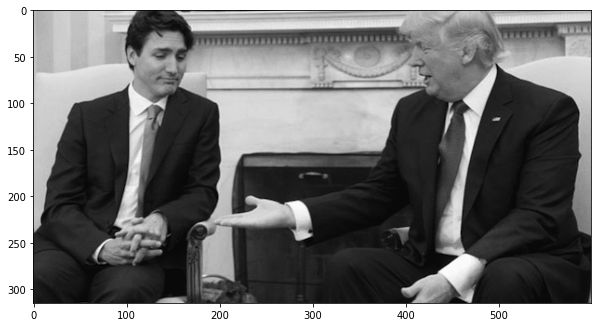

In [3]:
fig1 = plt.figure(figsize = (10,10))
imagelue = plt.imread('Trudeau.jpg')
image = color.rgb2gray(imagelue) #Après cette conversion les valeurs sont de 0 à 1. On pourrait multiplier par 255.
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()

Seuillage de l'image par une valeur arbitraire. 

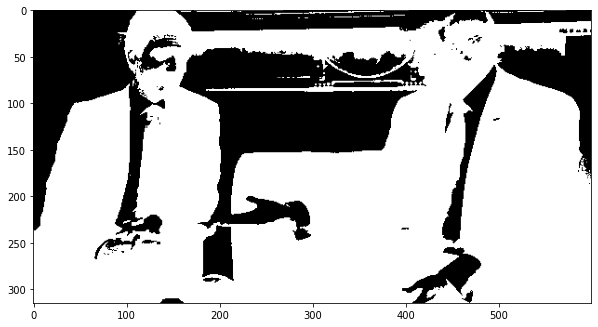

In [4]:
imageseuillee = image > 0.6
plt.figure(figsize = (10,10))
plt.imshow(imageseuillee, plt.get_cmap('binary'))
plt.show()

Des méthodes existent pour trouver le seuil automatiquement. Par exemple, la méthode de Otsu trouve le seuil qui sépare le mieux une distribution bimodale.

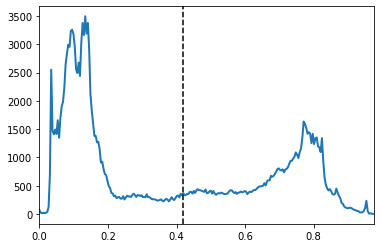

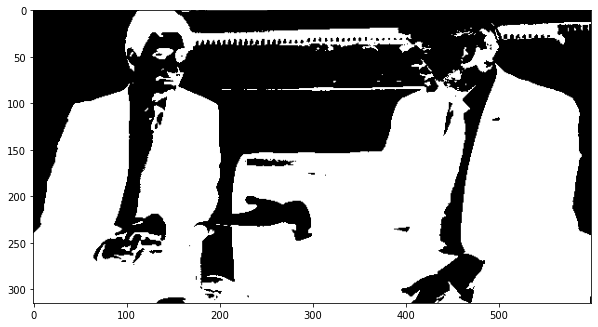

In [5]:
val = filters.threshold_otsu(image) #Application de la méthode de Otsu
imageseuillee = image > val

#illustration du seuil sur l'histogramme
hist, intervalles = np.histogram(image, bins=256)
plt.plot(intervalles[:-1], hist, lw=2)
plt.xlim(min(intervalles), max(intervalles))
plt.axvline(val, color='k', ls='--')

#Affiche de l'image seuillée
plt.figure(figsize = (10,10))
plt.imshow(imageseuillee, plt.get_cmap('binary'))
plt.show()